In [8]:
import cv2
im = cv2.imread("E:/deeplearning/datasets/ship_recognition_deeplearning/train/images/1794292.jpg")

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plttest_x
import os

In [9]:
from os import listdir
from os.path import isfile, join
mypath="E:/deeplearning/datasets/ship_recognition_deeplearning/train/images"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [12]:
cat=pd.read_csv("E:/deeplearning/datasets/ship_recognition_deeplearning/train/train.csv")
im_list=[]
im_resize=[]
image=cat.iloc[:,0]
count=0
for i in image:
    if i in onlyfiles:
        im_list.append(cv2.imread(mypath+"/"+ i))
        im_resize.append(cv2.resize(im_list[count],(250,250)))
        count+=1

In [13]:
cat_test=pd.read_csv("E:/deeplearning/datasets/ship_recognition_deeplearning/test_ApKoW4T.csv")
im_list_test=[]
im_resize_test=[]
image=cat_test.iloc[:,0]
count=0
for i in image:
    if i in onlyfiles:
        im_list_test.append(cv2.imread(mypath+"/"+ i))
        im_resize_test.append(cv2.resize(im_list_test[count],(250,250)))
        count+=1

In [14]:
import numpy as np
train_x = np.asarray(im_resize)
test_x = np.asarray(im_resize_test)

In [ ]:
train_x=train_x.astype('float32')
test_x=test_x.astype('float32')
train_x=train_x/255
test_x=test_x/255

In [15]:
train_x.shape

(6252, 250, 250, 3)

In [16]:
train_y=cat.iloc[:,1].values.astype('int64')

In [17]:
train_y = keras.utils.to_categorical(train_y)

In [18]:
train_y=train_y[:,1:]

In [22]:
num_classes = train_y.shape[1]

In [23]:
num_classes

5

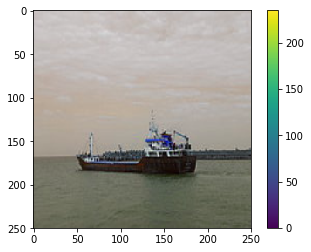

In [19]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(im_resize_test[1707])
plt.colorbar()
plt.grid(False)
plt.show()


In [20]:
input_shape=(250,250,3)

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten,BatchNormalization
from keras.optimizers import RMSprop

In [27]:
from nasnet import NASNetLarge, NASNetMobile

model = NASNetLarge(input_shape=(331, 331, 3), dropout=0.5)

ModuleNotFoundError: No module named 'nasnet'

In [22]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3),strides=(1,1),padding="same",
                                                  activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3),strides=(1,1),padding="valid",
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3),strides=(1,1),padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3),strides=(1,1),padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3),strides=(1,1),padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation = 'softmax'))

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 250, 250, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 125, 125, 32)      0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 125, 125, 32)      128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 123, 123, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 59, 59, 64)        36928     
__________

In [24]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [207]:
## Define optimizer: Stochastic gradient descent 
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

In [208]:
# Compile model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [26]:
history = model.fit(train_x, train_y,
                    batch_size=30,
                    epochs=100,
                    verbose=1,
                    validation_split=0.2)

Train on 5001 samples, validate on 1251 samples
Epoch 1/100
4200/5001 [========================>.....] - ETA: 5:29 - loss: 0.9726 - acc: 0.5981

KeyboardInterrupt: 

In [146]:
# Model evaluation with test data set 
# Prediction at test data set
Y_pred = model.predict(test_x)

In [147]:
import math
data=pd.DataFrame(Y_pred)

In [148]:
data

,0,1,2,3,4
0,2.715731e-04,8.400817e-04,1.020687e-05,8.211258e-01,1.777523e-01
1,1.690846e-18,1.563394e-12,2.183988e-19,1.000000e+00,8.670733e-24
2,5.024766e-10,1.332468e-04,6.705299e-13,9.998667e-01,1.079529e-11
3,3.671691e-21,1.000000e+00,1.022694e-26,1.731847e-26,6.912111e-19
4,3.760811e-05,3.182455e-03,1.536707e-03,9.942778e-01,9.653635e-04
5,1.937142e-09,6.084251e-06,8.638832e-10,9.999939e-01,2.235614e-10
6,2.185009e-15,9.695588e-12,7.422562e-15,1.000000e+00,6.788828e-17
7,1.686467e-04,9.899442e-01,1.713434e-05,9.833655e-03,3.636006e-05
8,8.136861e-05,9.947675e-01,8.269624e-09,5.151016e-03,6.569974e-08
9,7.020842e-07,3.330148e-06,1.211960e-12,9.999959e-01,7.203471e-12


In [149]:
class_pred=[]
for i in range(len(data)):
    for j in range(5):
        if np.max(data.iloc[i,:])==data.iloc[i,j]:
            class_pred.append(j+1)

In [166]:
for i in range(len(class_pred)):
    if(class_pred[i]==1):
        print(i)

68
74
124
233
269
299
309
316
347
534
535
536
547
548
549
552
553
555
558
561
562
563
564
565
567
583
585
586
588
598
600
601
602
603
613
614
615
617
624
626
627
630
632
633
636
651
659
669
670
674
678
683
687
691
692
700
701
702
703
704
705
706
708
711
712
713
716
719
720
721
722
728
730
733
736
740
751
756
758
762
763
764
768
772
773
774
775
782
785
791
792
793
794
795
800
802
806
811
814
816
823
824
826
828
829
831
838
841
849
852
856
861
862
863
864
865
867
875
881
882
883
884
887
890
894
898
899
913
914
918
919
920
927
944
948
950
951
952
953
956
958
962
965
966
967
968
970
975
979
981
984
987
993
995
1000
1001
1003
1005
1016
1019
1022
1023
1026
1028
1029
1030
1032
1033
1034
1035
1037
1039
1040
1042
1047
1048
1050
1051
1056
1057
1060
1066
1074
1080
1082
1086
1087
1090
1094
1100
1109
1120
1121
1122
1123
1126
1127
1130
1133
1134
1138
1140
1149
1151
1157
1159
1164
1168
1177
1179
1181
1182
1185
1186
1197
1200
1205
1206
1208
1211
1212
1213
1215
1216
1217
1221
1222
1225
1227
1236
1240
1

In [180]:
dat=pd.DataFrame(class_pred)

In [185]:
d=pd.concat([cat_test.reset_index(drop=True),dat],axis=1)

In [210]:
df=d.rename(columns={'image':'image',0:'category'})

In [211]:
df.to_csv("E:/deeplearning/datasets/ship_recognition_deeplearning/submission.csv",index=False)